Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering # hierarchical
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

In [ ]:
data=pd.read_csv("/content/crime_data.csv")

In [ ]:
data.head(5)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
features=data.iloc[:,1:5]
features

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [ ]:
scaler=MinMaxScaler()
scaled_features=scaler.fit_transform(features)

In [ ]:
print(scaled_features)

[[0.74698795 0.65410959 0.44067797 0.35917313]
 [0.55421687 0.74657534 0.27118644 0.96124031]
 [0.43975904 0.85273973 0.81355932 0.6124031 ]
 [0.48192771 0.49657534 0.30508475 0.31524548]
 [0.4939759  0.79109589 1.         0.86046512]
 [0.42771084 0.54452055 0.77966102 0.81136951]
 [0.15060241 0.22260274 0.76271186 0.09819121]
 [0.30722892 0.6609589  0.6779661  0.21963824]
 [0.87951807 0.99315068 0.81355932 0.63565891]
 [1.         0.56849315 0.47457627 0.47803618]
 [0.27108434 0.00342466 0.86440678 0.33333333]
 [0.10843373 0.25684932 0.37288136 0.17829457]
 [0.57831325 0.69863014 0.86440678 0.43152455]
 [0.38554217 0.23287671 0.55932203 0.35400517]
 [0.08433735 0.03767123 0.42372881 0.10335917]
 [0.31325301 0.23972603 0.57627119 0.27648579]
 [0.53614458 0.21917808 0.33898305 0.23255814]
 [0.87951807 0.69863014 0.57627119 0.38501292]
 [0.07831325 0.13013699 0.3220339  0.0129199 ]
 [0.63253012 0.87328767 0.59322034 0.52971576]
 [0.21686747 0.35616438 0.89830508 0.23255814]
 [0.68072289 

#K MEANS

In [ ]:
model=KMeans(n_clusters=3)
model.fit_predict(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 1, 0, 2, 1, 2, 1, 0, 1, 0, 2, 0,
       1, 0, 2, 1, 1, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2, 0, 1, 0, 0, 2,
       1, 2, 2, 1, 1, 2], dtype=int32)

In [ ]:
model.cluster_centers_

array([[0.69467343, 0.73395818, 0.61552186, 0.56629947],
       [0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.31425703, 0.33866058, 0.68361582, 0.31122595]])

ELBOW METHOD FOR K MEANS

In [ ]:
nc=range(1,11)
l=[]
for i in nc:

    model=KMeans(n_clusters=i)
    model.fit(scaled_features)
    l.append(model.inertia_)

In [ ]:
l

[13.184122550256447,
 6.596893867946196,
 5.010878493006417,
 3.6834561535859134,
 3.183157731676654,
 2.9353067138499647,
 2.6143496494785583,
 2.4216615657801173,
 2.056094034517336,
 1.7941357698464606]

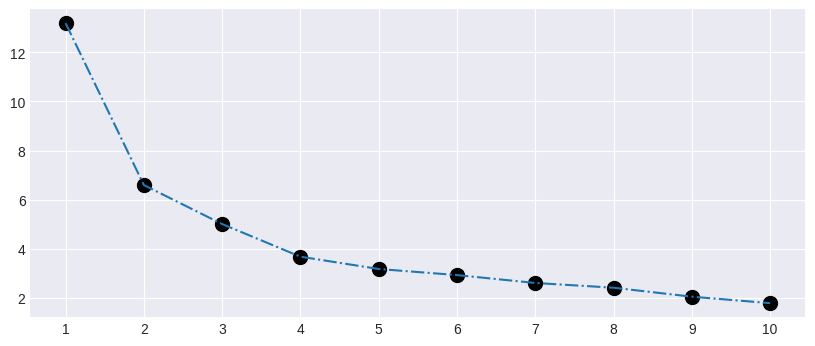

In [ ]:
plt.figure(figsize=(10,4))
plt.style.use("seaborn-darkgrid")
plt.scatter(nc,l,s=100,color="black")
plt.plot(nc,l,linestyle="-.")
plt.xticks(nc)
plt.show()

In [ ]:
#no. of clusters formed using k means is 4

SILHOUETTE SCORE FOR KMEANS

In [ ]:
nc=range(2,11)
l=[]
for i in nc:
  model=KMeans(n_clusters=i)
  l.append(silhouette_score(scaled_features,model.fit_predict(scaled_features)))

In [ ]:
l

[0.42364457559625074,
 0.32393600472652184,
 0.3349095719865253,
 0.304591667724218,
 0.3106654256449779,
 0.2802704341017799,
 0.2636722861621596,
 0.24606909029559162,
 0.2454153887632945]

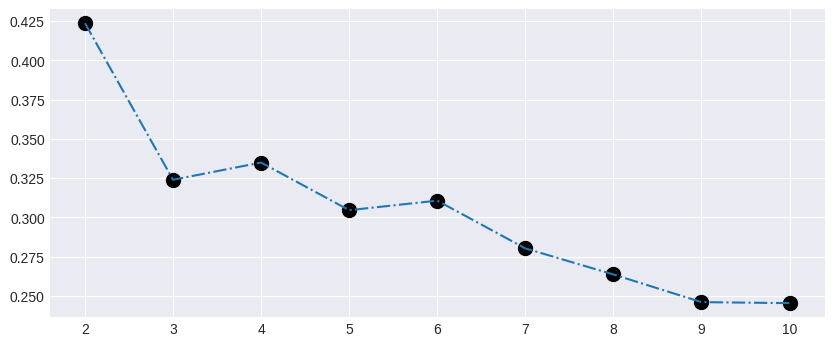

In [ ]:
plt.figure(figsize=(10,4))
plt.style.use("seaborn-darkgrid")
plt.scatter(nc,l,s=100,color="black")
plt.plot(nc,l,linestyle="-.")
plt.xticks(nc)
plt.show()

#HIERARCHIAL

In [ ]:
model=AgglomerativeClustering(n_clusters=3,affinity="l2",linkage="complete")
model.fit_predict(scaled_features)

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 1, 1])

SILHOUETTE SCORE FOR HIERARCHIAL

In [ ]:
nc=range(2,11)
l=[]
for i in nc:
  model=AgglomerativeClustering(n_clusters=i,affinity="l2", linkage="complete")
  l.append(silhouette_score(scaled_features, model.fit_predict(scaled_features)))

In [ ]:
l

[0.42364457559625074,
 0.30877213909512063,
 0.3060729442426308,
 0.3056360903608855,
 0.2728435659779423,
 0.27387642168206544,
 0.24780604916967508,
 0.2400551166172384,
 0.20643912850693227]

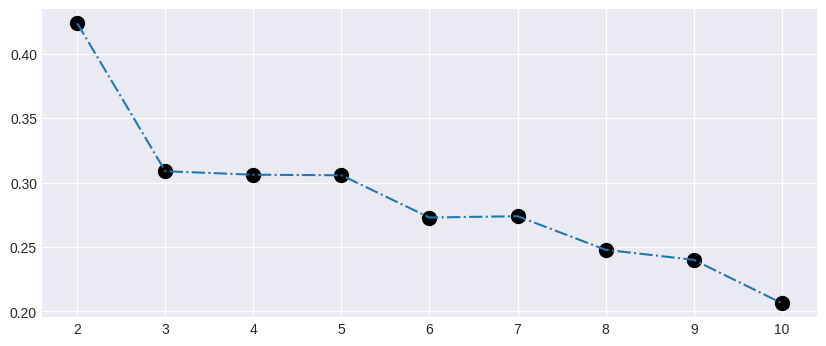

In [ ]:
plt.figure(figsize=(10,4))
plt.style.use("seaborn-darkgrid")
plt.scatter(nc,l,s=100,color="black")
plt.plot(nc,l,linestyle="-.")
plt.xticks(nc)
plt.show()

#DBSCAN

In [ ]:
model=DBSCAN(min_samples=2,eps=0.1)

model.fit_predict(x)

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1])

SILHOUETTE SCORE FOR DBSCAN

In [ ]:
nc=range(2,11)
l=[]
for i in nc:
  model=DBSCAN(min_samples=2,eps=0.1)
  l.append(silhouette_score(scaled_features,model.fit_predict(scaled_features)))

In [ ]:
l

[-0.2105918812292862,
 -0.2105918812292862,
 -0.2105918812292862,
 -0.2105918812292862,
 -0.2105918812292862,
 -0.2105918812292862,
 -0.2105918812292862,
 -0.2105918812292862,
 -0.2105918812292862]

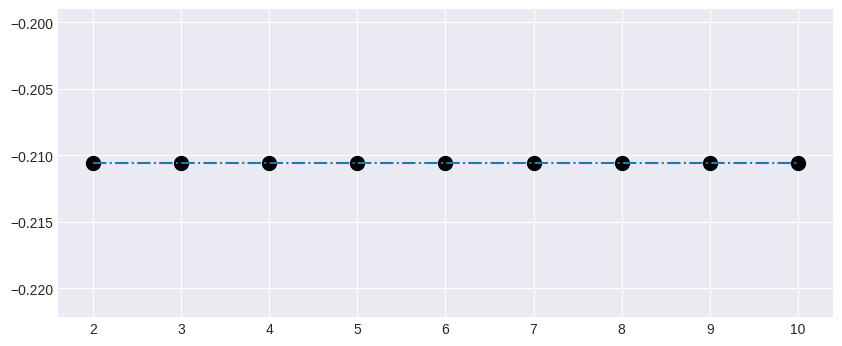

In [ ]:
plt.figure(figsize=(10,4))
plt.style.use("seaborn-darkgrid")
plt.scatter(nc,l,s=100,color="black")
plt.plot(nc,l,linestyle="-.")
plt.xticks(nc)
plt.show()